In [63]:
from qiskit import __version__
print(__version__)

1.4.2


In [64]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Input states are |T> states

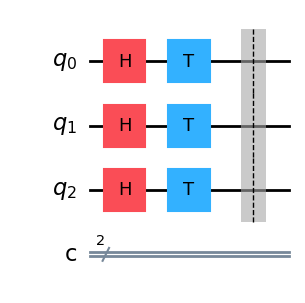

In [65]:
circuit = QuantumCircuit(3, 2)
for i in range(0, 3):
    circuit.h(i)
    circuit.t(i)
circuit.barrier()

display(circuit.draw(output='mpl'))

# Applying the Logical Operators

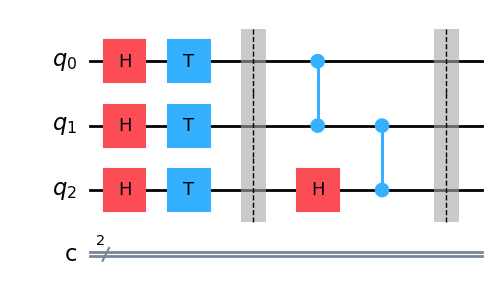

In [66]:
circuit.h(2)
circuit.cz(0, 1)
circuit.cz(1, 2)
circuit.barrier()

display(circuit.draw(output='mpl'))

# Measurement

In [ ]:
circuit.h(0)
circuit.h(1)
circuit.measure(0, 0)
circuit.measure(1, 1)

display(circuit.draw(output='mpl'))

# Measurement Outcomes

In [ ]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics)) 

# Comparing the output state to ideal T

In [67]:
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace

# Define the ideal T state
ideal_T = Statevector([np.cos(np.pi/8), np.sin(np.pi/8) * np.exp(1j * np.pi / 4)])

# Simulate the statevector
state = Statevector.from_instruction(circuit)

# Trace out qubits 0 and 1 to get the reduced state of qubit 2
rho_q2 = partial_trace(state, [0, 1])

# Calculate fidelity with ideal T state
fidelity = state_fidelity(rho_q2, ideal_T)
print(f"Fidelity with ideal T state: {fidelity:.4f}")

Fidelity with ideal T state: 0.7500
